In [1]:
import pandas as pd
import numpy as np
from scipy.stats import maxwell
from numpy.random import lognormal, normal

In [2]:
import sciope.core as core
import sciope.designs as designs
import sciope.inference as inference
import sciope.models as models
import sciope.sampling as sampling
import sciope.utilities as utilities
import sciope.data as data
import sciope.features as features
import sciope.stochmet as stochmet
import sciope.visualize as vizualize

import xgboost
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error as mse

from matplotlib import pyplot as plt 

'/home/nadia'

In [20]:
import re
import os
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(os.getcwd()) if isfile(join(os.getcwd(), f))]
p = re.compile('^.*\.model$')
model_paths = [ s for s in onlyfiles if p.match(s) ]

In [22]:
model_paths = np.array(model_paths)[[0, 1, 2, 5]]
model_paths

array(['xgb_2022-02-11 21:48:30.266066.model',
       'xgb_2022-02-11 21:00:59.281731.model',
       'xgb_2022-02-11 22:31:54.825717.model',
       'xgb_2022-02-11 20:40:17.346288.model'], dtype='<U36')

In [23]:
models = [xgboost.Booster() for i in model_paths]
for m, p in zip(models, model_paths):
    m.load_model(p)
    

In [14]:
soynam_test = pd.read_csv("soynam_test")
gen = pd.read_csv('~/Desktop/gen.csv', index_col='Unnamed: 0').fillna(4.0)


In [24]:
results = []
for m in models:
    results.append(m.predict(xgboost.DMatrix(gen.loc[soynam_test.strain])))
    


In [25]:
RMSE = []
R = []

for r in results:
    R.append(np.corrcoef(np.ravel(soynam_test.height), r)[0][1])
    
R

[0.46141251284858736,
 0.46500154783440756,
 0.4589832025077449,
 0.473304888248577]

In [6]:
def sort_by_importance(model):
    d = model.get_score(importance_type='gain')
    ordered = sorted(list(d), key = lambda x: d[x], reverse=True)
    return [[f for f in ordered], [d[f] for f in ordered]]
    
importances = [sort_by_importance(m) for m in models]

<StemContainer object of 3 artists>

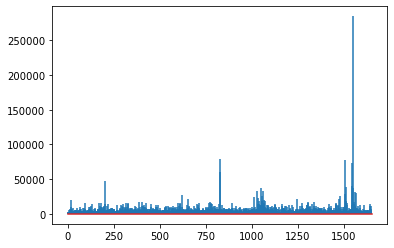

In [7]:
v = models[0].get_score(importance_type='gain').values()

plt.stem(v,  markerfmt=' ')


In [27]:
models[4].get_score(importance_type='gain')

{'f25': 14208.25,
 'f122': 64741.0,
 'f132': 40343.75,
 'f173': 87796.0,
 'f332': 73585.0,
 'f377': 48001.0,
 'f450': 53959.5,
 'f470': 40735.0,
 'f488': 85320.0,
 'f551': 66532.0,
 'f607': 47120.0,
 'f682': 44186.0,
 'f750': 42514.5,
 'f768': 44155.0,
 'f770': 61620.0,
 'f772': 13351.4375,
 'f976': 50510.0,
 'f980': 49449.0,
 'f1050': 67144.0,
 'f1054': 17316.625,
 'f1158': 30466.5,
 'f1599': 27716.0,
 'f1614': 66252.0,
 'f1681': 24469.375,
 'f1693': 35620.0,
 'f1704': 38280.0,
 'f1719': 76840.3359375,
 'f1726': 60047.5,
 'f1730': 70186.0,
 'f2039': 49186.5,
 'f2051': 92874.6640625,
 'f2075': 20372.25,
 'f2252': 39289.625,
 'f2365': 35159.0,
 'f2417': 66050.5,
 'f2472': 80604.0,
 'f2583': 95185.5546875,
 'f2584': 162226.609375,
 'f2952': 23836.25,
 'f3140': 59252.0,
 'f3262': 31756.0,
 'f3288': 61050.0,
 'f3291': 73127.0,
 'f3293': 38520.0,
 'f3297': 64868.0,
 'f3331': 35297.0,
 'f3339': 48866.75,
 'f3348': 17291.5,
 'f3383': 44430.0,
 'f3695': 46546.0,
 'f3696': 23433.0,
 'f3850': 66

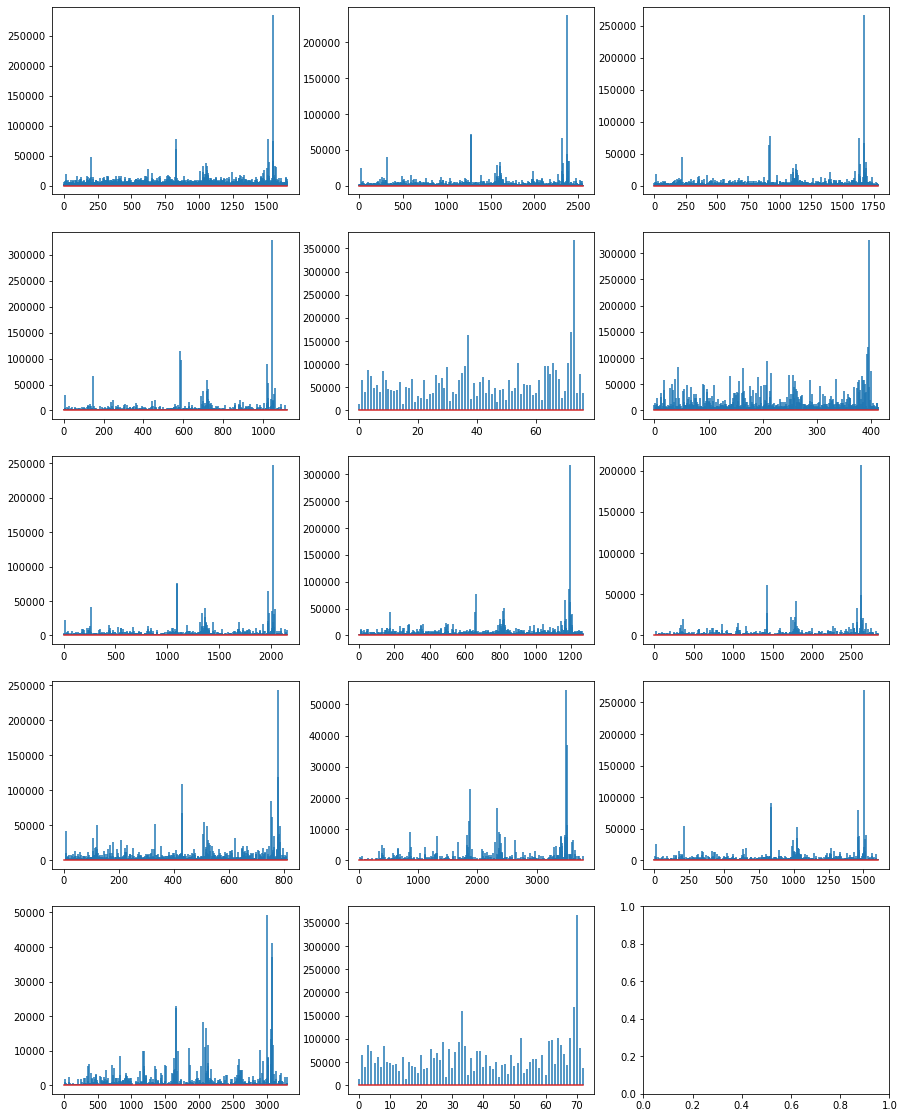

In [8]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize = (15, 20)) 
for i in range(3):
    for j in range(5):
        indx = j * 3 + i
        if indx + 1 > len(models):
            break
        m = models[indx]
        ax[j][i].stem(m.get_score(importance_type='gain').values(), markerfmt=' ')
            

In [9]:
import shap

soynam = pd.read_csv('~/Desktop/soynam.csv', index_col='Unnamed: 0')
soynam = soynam[soynam.height.notna()]
#soynam_check = pd.read_csv('~/Desktop/soynam_check.csv', index_col='Unnamed: 0')
gen = pd.read_csv('~/Desktop/gen.csv', index_col='Unnamed: 0').fillna(4.0)

In [10]:
import xgboost 
#xgboost.DMatrix(gen.loc[soynam.strain], label=soynam.height)

In [11]:
explainer = shap.TreeExplainer(models[0])
shv = explainer.shap_values(xgboost.DMatrix(gen.loc[soynam.strain], label=soynam.height))

array([[ 5.2645523e-04,  5.0139390e-03, -5.7963873e-03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 3.6270239e-03, -8.9747744e-05,  1.2596250e-03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 5.2645523e-04,  4.9781334e-03, -5.7963873e-03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 5.1315699e-05, -1.5699820e-03,  6.6591648e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.1418319e-04,  2.2541972e-04,  8.9821091e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 5.4605224e-04,  1.9735118e-05,  3.2658048e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [59]:
ie3 = set.intersection(*[set(i[0][:5000]) for i in importances])

In [60]:
len(ie3)

35

In [77]:
import json
json.loads(models[0].save_config())['learner']

{'generic_param': {'fail_on_invalid_gpu_id': '0',
  'gpu_id': '-1',
  'n_jobs': '4',
  'nthread': '4',
  'random_state': '0',
  'seed': '0',
  'seed_per_iteration': '0',
  'validate_parameters': '1'},
 'gradient_booster': {'gbtree_train_param': {'num_parallel_tree': '1',
   'predictor': 'auto',
   'process_type': 'default',
   'tree_method': 'auto',
   'updater': 'grow_colmaker,prune',
   'updater_seq': 'grow_colmaker,prune'},
  'name': 'gbtree',
  'specified_updater': False,
  'updater': {'grow_colmaker': {'colmaker_train_param': {'opt_dense_col': '1'},
    'train_param': {'alpha': '0',
     'cache_opt': '1',
     'colsample_bylevel': '1',
     'colsample_bynode': '1',
     'colsample_bytree': '1',
     'default_direction': 'learn',
     'eta': '0.300000012',
     'gamma': '0',
     'grow_policy': 'depthwise',
     'interaction_constraints': '',
     'lambda': '1',
     'learning_rate': '0.300000012',
     'max_bin': '256',
     'max_conflict_rate': '0',
     'max_delta_step': '0',
  

In [ ]:
params 
{'booster': 'gbtree',
 'verbosity': 2,
 'eta': 0.007060050427259946,
 'gamma': 0.001,
 'max_depth': 10,
 'min_child_weight': 6,
 'subsample': 1,
 'colsample_bytree': 1,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'grow_policy': 'lossguide'}